In [1]:
from main import DataFramePreprocessor
dfp = DataFramePreprocessor()

In [2]:
import numpy as np
import numpy.random as random
import pandas as pd
import scipy as sp
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = dfp.df
mean_minutes = df['minutes'].mean()
df.index

RangeIndex(start=0, stop=17696, step=1)

In [4]:
from sklearn import linear_model
from sklearn.metrics import r2_score

reg = linear_model.LinearRegression()
df.fillna(0, inplace=True)
var = ['minutes', 'shots', 'SoT', 'SiB', 'xG', 'npxG', 'G', 'npG',
            'key_passes', 'xA', 'A', 'xGC', 'GC', 'xCS', 'CS', 'xGI', 'npxGI', 'xP'
            , 'PvsxP', 'pos_touches', 'Att Pen',
            'carries_final_third', 'carries_penalty_area']
var = ['minutes', 'G', 'A', 'xGI', 'carries_penalty_area']
Y = df[var]
X = df['total_points'].values.reshape(-1, 1)
y = np.arange(0, len(var))

reg.fit(X, Y)

LinearRegression()

In [5]:

for col_num in y:
    reg.fit(X, Y.iloc[:, col_num])
    print('설명변수명 : {}'.format(Y.columns[col_num]))
    print('회귀계수:', reg.coef_)
    print('절편:', reg.intercept_)
    print('결정계수 : {:.3f}'.format(reg.score(X, Y.iloc[:, col_num])))
    print('')

설명변수명 : minutes
회귀계수: [10.23666935]
절편: 15.234663070873328
결정계수 : 0.390

설명변수명 : G
회귀계수: [0.06708596]
절편: -0.03205003289733322
결정계수 : 0.488

설명변수명 : A
회귀계수: [0.03449401]
절편: -0.007972479470442027
결정계수 : 0.187

설명변수명 : xGI
회귀계수: [0.0558021]
절편: 0.00879690744837721
결정계수 : 0.385

설명변수명 : carries_penalty_area
회귀계수: [0.08586517]
절편: 0.05648130145502822
결정계수 : 0.109



In [6]:
print(df)

        id  element_type      web_name        team_name opponent_team_name  \
0        1             4       Balogun          Arsenal  Nottingham Forest   
1        2             2        Cédric          Arsenal  Nottingham Forest   
2        3             3      M.Elneny          Arsenal  Nottingham Forest   
3        4             3  Fábio Vieira          Arsenal  Nottingham Forest   
4        5             2       Gabriel          Arsenal  Nottingham Forest   
...    ...           ...           ...              ...                ...   
17691  811             3          Sadi      Bournemouth             Fulham   
17692  812             4        Koumas        Liverpool            Burnley   
17693  813             1        Mrozek        Liverpool            Burnley   
17694  814             3        Wright  Manchester City            Everton   
17695  815             3      Bandeira          Arsenal           West Ham   

       was_home  now_cost  selected_by_percent  gameweek  minut

In [7]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


Y = pd.DataFrame(df, columns=['total_points'])
Y.fillna(0, inplace=True)
X = df[var]


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.5, random_state=0)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

full_model = sm.OLS(y_train, X_train_scaled)
fitted_full_model = full_model.fit()
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           total_points   R-squared (uncentered):                   0.658
Model:                            OLS   Adj. R-squared (uncentered):              0.658
Method:                 Least Squares   F-statistic:                              3404.
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                        0.00
Time:                        17:07:22   Log-Likelihood:                         -16333.
No. Observations:                8848   AIC:                                  3.268e+04
Df Residuals:                    8843   BIC:                                  3.271e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9910      0.019     53.554      0.000       0.955       1.027
x2             1.3605      0.020     67.004      0.000       1.321       1.400
x3             0.7190      0.018     39.089      0.000       0.683       0.755
x4            -0.0179      0.024     -0.740      0.460      -0.065       0.030
x5             0.0222      0.018      1.228      0.219      -0.013       0.058
==============================================================================
Omnibus:                     5003.874   Durbin-Watson:                   0.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79103.272
Skew:                           2.383   Prob(JB):                         0.00
Kurtosis:                      16.851   Cond. No.                         2.76
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaled_df = df[var]
scaled_df[var] = scaler.fit_transform(df[var])

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(scaled_df.values, i) for i in range(scaled_df.shape[1])]
vif['features'] = scaled_df.columns
vif

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_37125/3579230553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[var] = scaler.fit_transform(df[var])


,VIF Factor,features
0,1.279175,minutes
1,1.505198,G
2,1.248993,A
3,2.155842,xGI
4,1.252781,carries_penalty_area


In [9]:
X2 = pd.DataFrame(scaled_df, columns = var)

X2.corr()

,minutes,G,A,xGI,carries_penalty_area
minutes,1.000000,0.243443,0.215802,0.442064,0.320364
G,0.243443,1.000000,0.082142,0.556912,0.241863
A,0.215802,0.082142,1.000000,0.408524,0.193943
xGI,0.442064,0.556912,0.408524,1.000000,0.423485
carries_penalty_area,0.320364,0.241863,0.193943,0.423485,1.000000


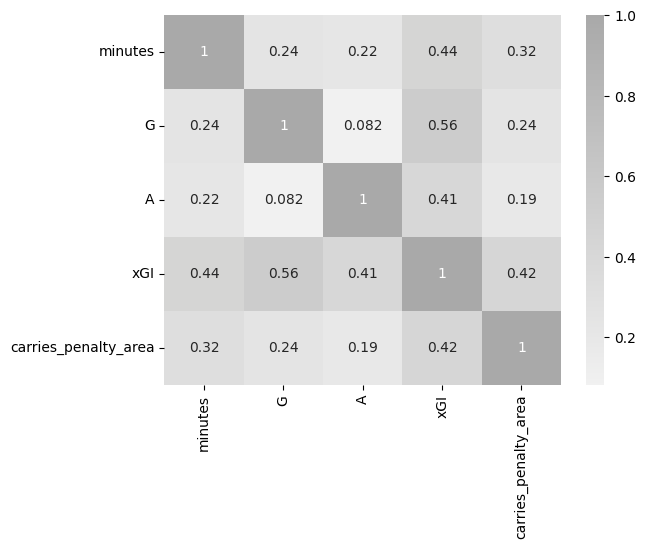

In [10]:
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X2.corr(), annot=True, cmap=cmap)
plt.show()